Output()

Output()

         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     58.019  0.805    56.343     59.566      0.021    0.015    1629.0   
sigma   2.352  0.692     1.327      3.744      0.018    0.013    1634.0   

       ess_tail  r_hat  
mu       1389.0    1.0  
sigma    1633.0    1.0  


array([<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'sigma'}>],
      dtype=object)

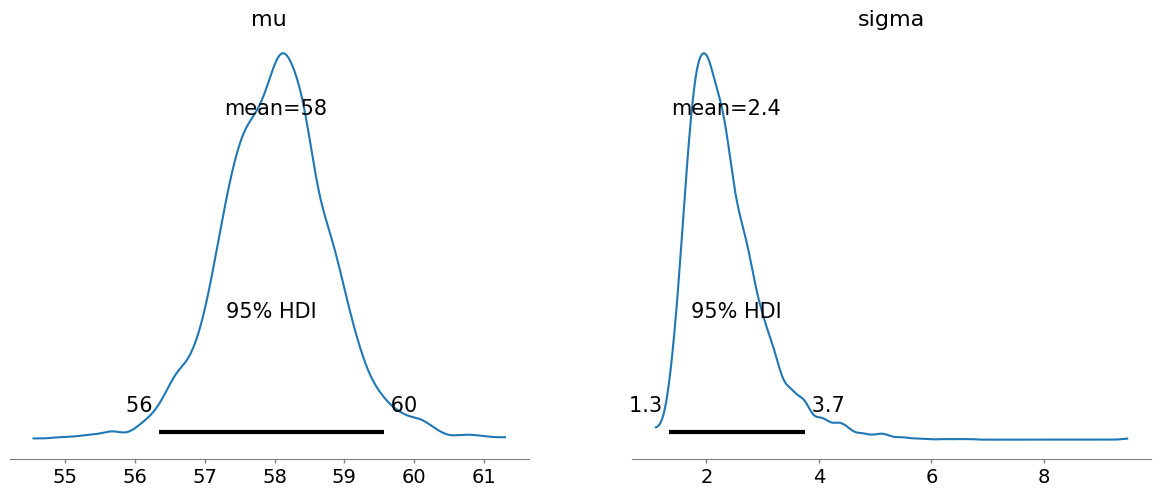

In [1]:
import pymc as pm
import numpy as np
import arviz as az

observatii = np.array([56, 60, 58, 55, 57, 59, 61, 56, 58, 60])

with pm.Model() as model:
    mu = pm.Normal("mu", mu=60, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=10)

    X_obs = pm.Normal("X_obs", mu=mu, sigma=sigma, observed=observatii)

    trace = pm.sample(2000, tune=1000, target_accept=0.9)

summary = az.summary(trace, hdi_prob=0.95)
print(summary)
az.plot_posterior(trace, hdi_prob=0.95)